<p><img alt="Colaboratory logo" height="65px" src="https://upload.wikimedia.org/wikipedia/en/thumb/b/b1/Davivienda_logo.svg/1200px-Davivienda_logo.svg.png" align="left" hspace="10px" width="20%" vspace="15px"></p>

<h1 align="center"> Prueba Técnica Profesional III Departamento de Datos no Estructurados  </h1>


En el Departamento de Datos No Estructurados buscamos personas con excelentes capacidades técnicas a las que les guste explorar los últimos avances en IA para asumir retos de especial dificultad. Aunque la siguiente prueba busca, en primera instancia, corroborar su idoneidad técnica, para nosotros es muy importante que esta destreza venga acompañada de dos elementos adicionales:

1.   Creatividad para encarar desafíos técnicos en procesamiento de datos no estructurados.
2.   Habilidad para comunicar el trabajo hecho y sus resultados a un público general o experto.


---


### **Análisis de Tweets** 

Una de las actividades tipicas en el departamento es el analisis, mineria de texto y procesamiento de lenguaje natural para los diferentes procesos operativos o que tienen interacción con el Banco. Para este ejercicio se adjutará un base de datos llamada **davivienda_tweets.csv** o directamente puede descargarla empleando el siguiente comando.

```
!wget "https://raw.githubusercontent.com/yemoncada/davivienda_tweets/main/davivienda_tweets.csv" -P "/content"
```

Este archivo contiene un conjunto de **tweets extraidos de la red social** de Twitter que contienen la palabra **Davivienda** y con el cual quisieramos conocer cual es la interacción que tienen los diferentes usuarios de la red social con el Banco Davivienda. Todo esto a partir de una exploración general de lo que esta en los textos, cabe destacar que este notebook esta diseñado para que realice una exploración guiada y que por medio de esta vaya realizando sus propios descubrimientos e insights sobre la base de datos.

Por último y con la finalidad de obtener un analisis más detallado, realice un modelo no supervisado Latent Dirichlet Allocation (LDA) que permita conocer por topicos, cuales son los temas más hablados en Twitter asociados a la palabra Davivienda.

<p><img alt="Colaboratory logo" src="https://i.ibb.co/3zNV9vX/1-Gp-PEknl-KMQ09-Uk-Et-Y6-MZOw.png" align="left" hspace="10px" vspace="15px"></p>


***Nota***: *Considere que este ejercicio es hipotético y el banco no usará su trabajo más que para evaluar sus habilidades para el cargo*

In [ ]:

!wget "https://raw.githubusercontent.com/yemoncada/davivienda_tweets/main/davivienda_tweets.csv" -P "/content"


--2022-08-04 15:02:09--  https://raw.githubusercontent.com/yemoncada/davivienda_tweets/main/davivienda_tweets.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 677050 (661K) [text/plain]
Saving to: ‘/content/davivienda_tweets.csv’

davivienda_tweets.c 100%[===================>] 661.18K  --.-KB/s    in 0.02s   

2022-08-04 15:02:10 (40.5 MB/s) - ‘/content/davivienda_tweets.csv’ saved [677050/677050]



In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
!pip install stanza

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 574 kB 5.1 MB/s 
     |████████████████████████████████| 4.7 MB 51.3 MB/s 
     |████████████████████████████████| 197 kB 57.3 MB/s 
     |████████████████████████████████| 596 kB 50.6 MB/s 
     |████████████████████████████████| 101 kB 10.9 MB/s 
     |████████████████████████████████| 6.6 MB 39.1 MB/s 
  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193022 sha256=9ae3e9c1641db6a8d86887890559db8534ed299b9d680a71d50413eb15f230c7
  Stored in directory: /root/.cache/pip/wheels/ec/29/4d/3cfe7452ac7d8d83b1930f8a6205c3c9649b24e80f9029fc38
Successfully built emoji
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
import nltk
import spacy
#import textblob
from wordcloud import WordCloud

import os
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')


from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')
stemmer = nltk.stem.SnowballStemmer('spanish')

from gensim import corpora
from gensim import models

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
!python -m spacy download es_core_news_md

2022-08-10 01:37:07.607592: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42.3 MB 195 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')


In [6]:
os.chdir('gdrive')
os.chdir('MyDrive')
os.chdir('Davivienda')
os.chdir('Chats')



---



## Mineria de Texto - Davivienda Tweets.

Con la finalidad de realizar el ejercicio de mineria y procesamiento de lenguaje natural puede utilizar cualquier libreria de python que facilite las siguientes tareas:

1. ***Analisis exploratorio*** y descriptivo de la base de datos davivienda_tweets.csv

2. ***Prepocesamiento del texto***:

    * Tokenizar: Separar el texto en párrafos, frases, etc..
    * Limpieza: Minúsculas, quito puntuación, remuevo palabras de 3 caracteres, etc. Utilice expresiones regulares para limpiar su texto.
    * Stopwords: estas palabras no tienen un significado por sí solas, sino que modifican o acompañan a otras.
    * Lematizar: cambio de tiempos verbales.
    * Estematizar o Stemmed: convertir palabras a sus raíces

3. ***WordClouds o Nubes de Palabras*** que permitan la visualización de datos  textuales significativos y conocer su relevancia en el texto.

4. ***Matriz termino-documento*** - Document-Term Matrix.

5. ***Histograma*** de palabras más importantes.

6. ***Latent Dirichlet Allocation*** - Modelo no supervisado de Tópicos.

7. ***Interpretación de Resultados y conclusiones generales.***


## 1. Análisis Exploratorio

En este a partado realice el análisis exploratorio y descriptivo de la base de datos davivienda_tweets.csv

In [7]:
df0 =pd.read_csv('davivienda_tweets.csv')
# df.head(5)

In [8]:
df = pd.DataFrame()
df['corpus'] = df0['Embedded_text']
"""
for i in range(len(df)):
  if i%200 ==0 :
    print(i)
    print(text[i])"""

'\nfor i in range(len(df)):\n  if i%200 ==0 :\n    print(i)\n    print(text[i])'

## 2. Prepocesamiento de Texto

In [9]:
# Tokenización y limpieza según la guía
tokenizer = nltk.LineTokenizer()
df['Parrafo'] = [tokenizer.tokenize(doc) for doc in df['corpus']]

tokenizer = nltk.SpaceTokenizer()
df['Palabras'] = [tokenizer.tokenize(doc) for doc in df['corpus']]


chars = '[%s]+' % re.escape(string.punctuation)

parrafo_minuscula = []
parrafo_minuscula.append([[re.sub(chars,"",word.lower())  for word in doc] for doc in df['Parrafo']])
df['Parrafo'] = parrafo_minuscula[0]

palabras_minuscula = []
palabras_minuscula.append([[re.sub(chars,"",word.lower()) for word in doc if len(word)>3] for doc in df['Palabras']])
df['Palabras'] = palabras_minuscula[0]

In [10]:
#Limpieza de los datos
lemma = spacy.load('es_core_news_md')
def process(text): 
    doc_nor = text.lower()
    doc_nor = re.sub('\w*\d\w*','', doc_nor)
    doc_nor = re.sub(r'[%s]' % re.escape(string.punctuation), '', doc_nor)
    doc_nor = re.sub(' +',' ',doc_nor)

    doc_nor = ' '.join([word for word in doc_nor.split() if len(word)>3 ])
    doc_nor = ' '.join([word for word in doc_nor.split() if word not in (stopwords)])

    lemmatizador = lemma(doc_nor)
    doc_nor = ' '.join([word.lemma_ for word in lemmatizador])
    doc_nor = ' '.join([stemmer.stem(word) for word in doc_nor.split()])
    return doc_nor


df['cleaned'] = df['corpus'].apply(lambda x: process(x)) 

## 3. WordClouds o Nubes de Palabras

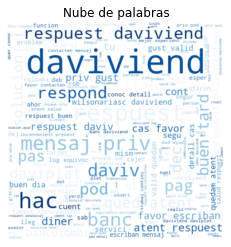

<Figure size 432x288 with 0 Axes>

In [46]:
words = " ".join([word for sentence in df.cleaned for word in sentence.split()])
word_cloud = WordCloud(width=480, height=480, colormap = "Blues", background_color='white').generate(words)

plt.figure(figsize=(4,4))
plt.imshow(word_cloud, interpolation = "bilinear")
plt.title("Nube de palabras")
plt.axis("off")
plt.show()

plt.savefig("nube.png")

## Matriz termino-documento - Document-Term Matrix

In [11]:
doc = df['cleaned'].values.tolist()
dataset = [d.split() for d in doc]
dictionary = corpora.Dictionary(dataset)
dictionary.filter_extremes(no_below=5)
dictionary.save('midict.dict')

In [12]:
from smart_open import smart_open

textfile = open("Corpus.txt", "w")
for element in doc:
    textfile.write(element+ "\n")
textfile.close()

In [13]:
from smart_open import smart_open

##  Market Matrix format
# Paso 1: Construir el corpus a partir de documento de texto
class MyCorpus(object):
    def __iter__(self):
        for line in smart_open("Corpus.txt","r"):
            yield dictionary.doc2bow(process(line).split())

corpus_memory_friendly = MyCorpus()
corpora.MmCorpus.serialize("corpus.mm",corpus_memory_friendly)

In [14]:
# Paso 2: Construir modelo TfIdf a partir del  corpus
#dictionary = corpora.Dictionary.load('midict.dict')
corpus = corpora.MmCorpus('corpus.mm')
tfidf = models.TfidfModel(corpus)


In [15]:
#Paso 3: Construir la matriz
vocab = [dictionary[i] for i in range(len(dictionary))]
index = list(range(len(corpus)))

tf_idf = pd.DataFrame(data=np.zeros((len(corpus), len(vocab)), dtype=np.float16),
                  index=index,
                  columns=vocab)

for idx in index:
    for id, freq in tfidf[corpus[idx]]:
        tf_idf[dictionary[id]][idx] = freq

In [23]:
# Probar el modelo con consultas particulares
query = "La confianza se afectó. El indicador de confianza Davivienda tuvo una  leve caída en noviembre, rompiendo una tendencia de cinco meses de mejoras. El indicador se deterioró, especialmente en la última semana del mes, asociado al aumento en la tasa de cambio.\n1\n7\n19"
query_doc_bow = dictionary.doc2bow(process(query)) # Important: Same corpus preprocess
print(query_doc_bow)
print(tfidf[query_doc_bow]) # Model transformation

'La confianza se afectó. El indicador de confianza Davivienda tuvo una  leve caída en noviembre, rompiendo una tendencia de cinco meses de mejoras. El indicador se deterioró, especialmente en la última semana del mes, asociado al aumento en la tasa de cambio.\n1\n7\n19'

## 6. Latent Dirichlet Allocation - Modelo no supervisado de Tópicos.

El topic modeling es una técnica no supervisada de NLP, capaz de detectar y extraer de manera automática relaciones semánticas latentes de grandes volúmenes de información.

Estas relaciones son los llamados tópicos, que son un conjunto de palabras que suelen aparecer juntas en los mismos contextos y nos permiten observar relaciones que seríamos incapaces de observar a simple vista.

In [35]:
lda_model = models.LdaMulticore(corpus, num_topics=5, id2word=dictionary, passes=5, workers=2)

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.035*"banc" + 0.026*"servici" + 0.024*"client" + 0.024*"wilsonariasc" + 0.024*"daviv" + 0.021*"bancolombi" + 0.020*"equivoc" + 0.014*"nombr" + 0.013*"señor" + 0.012*"habl"
Topic: 1 
Words: 0.038*"daviv" + 0.025*"mensaj" + 0.020*"favor" + 0.018*"inform" + 0.017*"wilsonariasc" + 0.017*"envi" + 0.017*"respond" + 0.016*"segu" + 0.016*"daviplat" + 0.014*"problem"
Topic: 2 
Words: 0.065*"mensaj" + 0.065*"buen" + 0.060*"priv" + 0.059*"atent" + 0.047*"favor" + 0.035*"tard" + 0.033*"qued" + 0.028*"gust" + 0.025*"detall" + 0.024*"inconvenient"
Topic: 3 
Words: 0.052*"respond" + 0.032*"daviplat" + 0.022*"marianiniechev" + 0.021*"cont" + 0.021*"cuent" + 0.016*"segur" + 0.015*"bloqu" + 0.015*"daviv" + 0.014*"segurosboliv" + 0.013*"llam"
Topic: 4 
Words: 0.031*"banc" + 0.030*"solucion" + 0.025*"daviv" + 0.016*"tarjet" + 0.015*"daviplat" + 0.015*"cont" + 0.015*"llam" + 0.014*"esper" + 0.014*"sfcsupervisor" + 0.013*"credit"


In [36]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=df['cleaned']):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=df['cleaned'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4.0,0.9373,"banc, solucion, daviv, tarjet, daviplat, cont, llam, esper, sfcsupervisor, credit",confianz afect indic confianz daviviend lev caid noviembr romp tendenci cinc mes mejor indic det...
1,1,4.0,0.9365,"banc, solucion, daviv, tarjet, daviplat, cont, llam, esper, sfcsupervisor, credit",busc accesibil mejor atencion tramit bancari el encontr plaz siguient banc preferenci banc cusca...
2,2,0.0,0.8828,"banc, servici, client, wilsonariasc, daviv, bancolombi, equivoc, nombr, señor, habl",señor daviviend pod ingres daviviend ingres cedul dec verific dat llev vari dia
3,3,4.0,0.5355,"banc, solucion, daviv, tarjet, daviplat, cont, llam, esper, sfcsupervisor, credit",llev tod seman sufr intent hurt medi electron cont ahorr daviviend pod realiz plat feliz hac pod...
4,4,0.0,0.5899,"banc, servici, client, wilsonariasc, daviv, bancolombi, equivoc, nombr, señor, habl",retroced pais gobiern malpar cajer daviv dizqu sol bot pes billet maric
5,5,1.0,0.7782,"daviv, mensaj, favor, inform, wilsonariasc, envi, respond, segu, daviplat, problem",open dat preguntel gent import import respond plat rob daviplat daviviend rdaviviendanorespond b...
6,6,3.0,0.4124,"respond, daviplat, marianiniechev, cont, cuent, segur, bloqu, daviv, segurosboliv, llam",conoc requisit convocatori bec talent fundacion boliv daviviend httpsbddyme
7,7,2.0,0.5968,"mensaj, buen, priv, atent, favor, tard, qued, gust, detall, inconvenient",mam adult ten trabaj pag el daviviend
8,8,4.0,0.9607,"banc, solucion, daviv, tarjet, daviplat, cont, llam, esper, sfcsupervisor, credit",daviplat ayud favor llev mes trat cambi numer daviplat nadi ayud nuev line whatsapp ineficient n...
9,9,0.0,0.8262,"banc, servici, client, wilsonariasc, daviv, bancolombi, equivoc, nombr, señor, habl",ciert recuerd vend empres bavari coltabac fusion grup sur grup argos bancolombi nutres exit banc...


In [47]:
df_dominant_topic.to_csv("topico_dominante.csv")

In [37]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9459,"banc, servici, client, wilsonariasc, daviv, bancolombi, equivoc, nombr, señor, habl",respuest bancolombi rechac millon hac falabell millon ayer daviviend gent prest millon garr quer...
1,1.0,0.9671,"daviv, mensaj, favor, inform, wilsonariasc, envi, respond, segu, daviplat, problem",telefon respuest siti tampoc solucion tip ingres siti daviv facebook expon problem emple dec deb...
2,2.0,0.9609,"mensaj, buen, priv, atent, favor, tard, qued, gust, detall, inconvenient",daviviend gananci millon sol primer trimestr proces recuper econom tu segu saqu ahorr ate banc d...
3,3.0,0.9547,"respond, daviplat, marianiniechev, cont, cuent, segur, bloqu, daviv, segurosboliv, llam",respuest binanc daviviend busc pilot cuent pod bloqu increibl segu segu bloqu cuent respuest inc...
4,4.0,0.9738,"banc, solucion, daviv, tarjet, daviplat, cont, llam, esper, sfcsupervisor, credit",daviviend robader plat cancel cuent quer amig hac seman sac credit viern desembols minut despues...


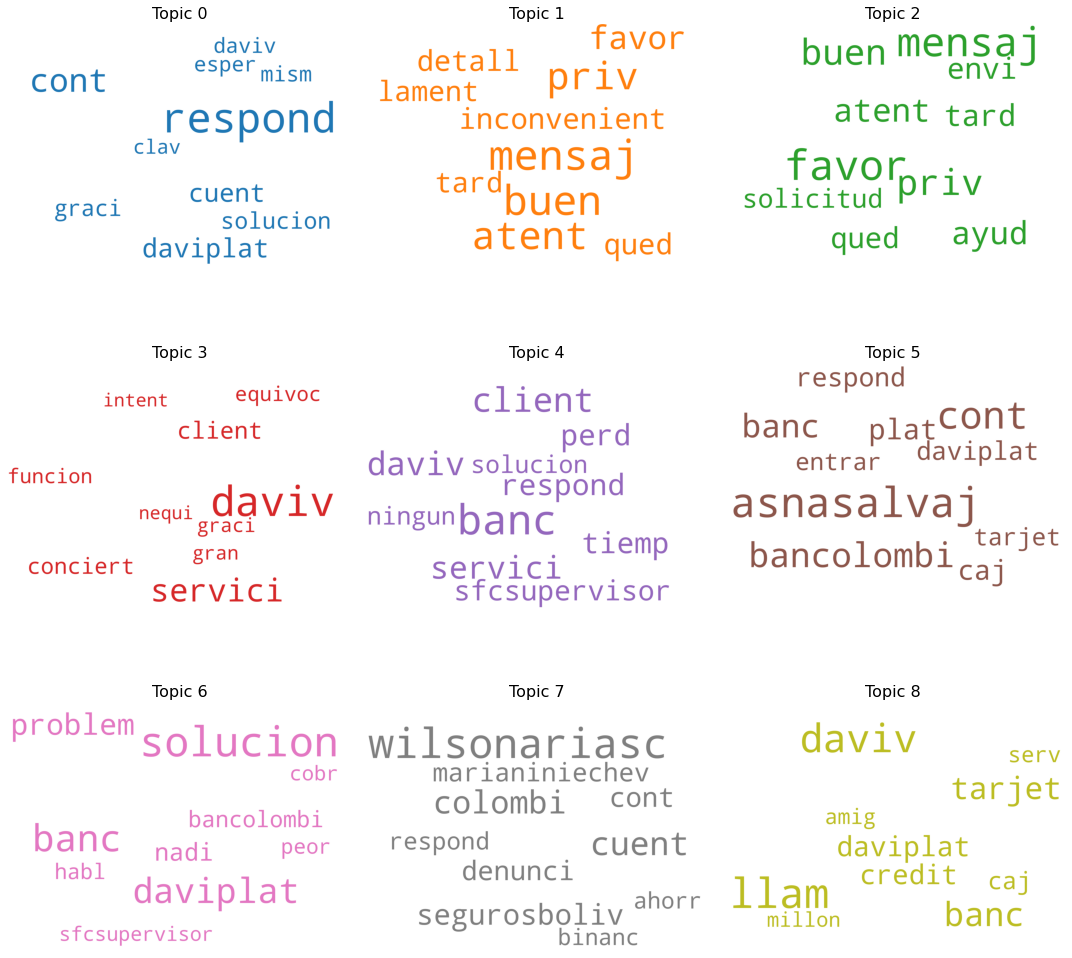

In [24]:
# 1. Wordcloud of Top N words in each topic
#from matplotlib import pyplot as plt
#from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

## 7. Interpretación de Resultados y conclusiones generales.

In [39]:
len(df['corpus'])

1811

In [45]:
df['cleaned'][0]

'confianz afect indic confianz daviviend lev caid noviembr romp tendenci cinc mes mejor indic deterior especial ultim seman asoci aument tas cambi'